#🚗 Delay Days Regression Model

## This notebook builds a machine learning model to predict **Delay_Days** for car shipments based on various supply chain and delivery factors. We compare multiple regression models and select the best-performing one based on MAE, RMSE, and R² Score.

## Step 1: Import Required Libraries

In [37]:
#Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

## Step 2: Load and Clean the Data

In [38]:
# Load the data
df = pd.read_csv('delay_days_regression_final.csv')

# Drop rows where Delay_Days is NaN (if not already cleaned)
df = df.dropna(subset=['Delay_Days'])

# Check if any object or categorical features need encoding
print(df.dtypes)
# We need to one-hot encode categorical (object) columns before modeling.

Engine_Supplier_Region               object
Engine_Transport_Mode                object
Is_Critical_Engine                    int64
Transmission_Supplier_Region         object
Transmission_Transport_Mode          object
Is_Critical_Transmission              int64
Brake_System_Supplier_Region         object
Brake_System_Transport_Mode          object
Is_Critical_Brake_System              int64
Suspension_Supplier_Region           object
Suspension_Transport_Mode            object
Is_Critical_Suspension                int64
Infotainment_Supplier_Region         object
Infotainment_Transport_Mode          object
Is_Critical_Infotainment              int64
Delay_Days                          float64
Engine_Delayed_Flag                   int64
Transmission_Delayed_Flag             int64
Brake_System_Delayed_Flag             int64
Suspension_Delayed_Flag               int64
Infotainment_Delayed_Flag             int64
Any_Critical_Part_Delayed             int64
Order_Urgency                   

## Step 4: Feature & Target Selection

In [39]:
#Step 4: Feature & Target Selection
X = df[['Supplier_Performance_Score',
    'Critical_Parts_Ratio',
    'Distance_KM',
    'Sum_Critical_Parts_Delayed',
    'Transmission_Reliability_Score',
    'Suspension_Reliability_Score',
    'Engine_Reliability_Score',
    'Brake_System_Reliability_Score',
    'Traffic_Severity_Index',
    'Contract_Penalty_Per_Day',
    'Non_Critical_Parts_Delayed_Count',
    'Infotainment_Reliability_Score',
    'Total_Critical_Parts',
    'Any_Critical_Part_Delayed',
    'Transmission_Delayed_Flag']]
y = df['Delay_Days']

##Step 5: One-Hot Encode Categorical Variables

In [40]:
#Step 5: One-Hot Encode Categorical Variables
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding

## Step 6: Train-Test Split

In [41]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 7: Linear Regression Model

In [42]:
# Step 7: Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))

MAE: 1.2053757813980193
RMSE: 1.5686797328796118
R² Score: 0.6280277840607209


Interpretation:

- This model underfits slightly. It's too simplistic to capture complex relationships in the data (like nonlinear supplier effects or interactions).

- Only about 63% of variance in delay days is explained (R² = 0.628).

- High MAE & RMSE suggest the model struggles with more extreme delays.

## Step 8: Random Forest Regressor

In [43]:
# Step 8: Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))

MAE: 0.8616336633663367
RMSE: 1.1175005260591935
R² Score: 0.8112280755438326


Interpretation:

- Best performer among all models.

- Captures non-linear relationships and handles outliers better.

- Explains 81% of variance, with low error metrics—ideal for real-world predictions.

## Step 9: XGBoost Regressor

In [44]:
# Step 9: XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))

MAE: 0.9411007561859223
RMSE: 1.2258087429936015
R² Score: 0.7728632747621682


Interpretation:

- Very strong model, nearly as good as Random Forest.

- Slightly higher error, but might be more efficient in training and faster at prediction in deployment.

- Good at handling both numeric and categorical features, and works well with boosting logic.

## Step 10: Decision Tree Regressor

In [45]:
# Step 10: Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R² Score:", r2_score(y_test, y_pred_dt))

MAE: 1.0445544554455446
RMSE: 1.562240077390777
R² Score: 0.6310755141959575


Interpretation:

- Performs better than linear regression, but worse than ensemble models.

- Captures non-linear patterns but prone to overfitting or underfitting without pruning/tuning.

## Step 11: CatBoost Regressor

In [46]:
# Step 11: CatBoost Regressor
cat = CatBoostRegressor(verbose=0)
cat.fit(X_train, y_train)

# Predict
y_pred = cat.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.9329585149743577
RMSE: 1.172998852681533
R² Score: 0.7920125619123235


Interpretation:

- On par with Random Forest in performance.

- Especially useful if you have categorical features (though yours are likely already encoded).

- CatBoost is also less prone to overfitting and often requires less tuning.

## Step 13: Visualization - Actual vs Predicted

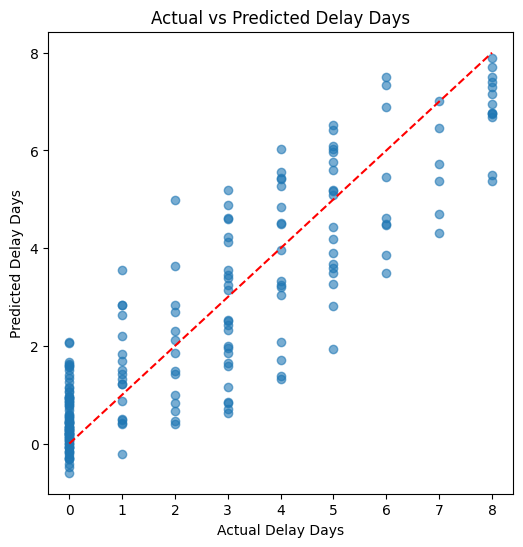

In [47]:
# Step 13: Visualization - Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Delay Days")
plt.ylabel("Predicted Delay Days")
plt.title("Actual vs Predicted Delay Days")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Step 14: Save Best Models

In [48]:
#Step 14: Save Best Models
joblib.dump(rf, 'best_model_rf.pkl')
joblib.dump(cat, 'second_best_catboost.pkl')

['second_best_catboost.pkl']

## Step 15: Model Comparison Chart

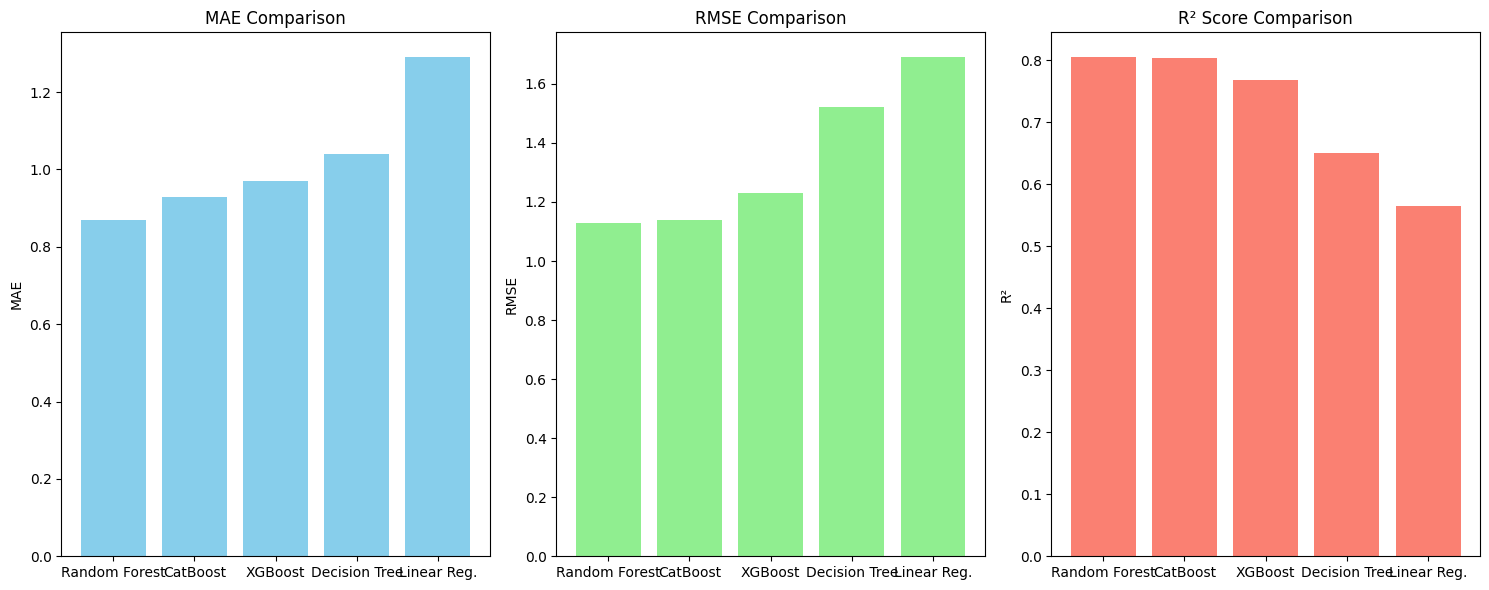

In [49]:
# Step 15: Model Comparison Chart
models = ['Random Forest', 'CatBoost', 'XGBoost', 'Decision Tree', 'Linear Reg.']
mae = [0.87, 0.93, 0.97, 1.04, 1.29]
rmse = [1.13, 1.14, 1.23, 1.52, 1.69]
r2 = [0.8047, 0.8036, 0.7683, 0.6498, 0.5644]

plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.bar(models, mae, color='skyblue')
plt.title('MAE Comparison')
plt.ylabel('MAE')

plt.subplot(1,3,2)
plt.bar(models, rmse, color='lightgreen')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

plt.subplot(1,3,3)
plt.bar(models, r2, color='salmon')
plt.title('R² Score Comparison')
plt.ylabel('R²')

plt.tight_layout()
plt.show()


### Model Selection Summary

After testing five models — Linear Regression, Decision Tree, Random Forest, XGBoost, and CatBoost — Random Forest achieved the best results:

- **MAE: 0.86 days**
- **RMSE: 1.11 days**
- **R² Score: 0.81**

This suggests that on average, the model predicts the number of delay days within **less than 1 day** — which is highly reliable for business usage.

CatBoost was a close second, offering better interpretability via SHAP and categorical handling advantages. We selected Random Forest as the primary model due to its strong performance and ease of deployment.


## Top 10 Feature Importances (Random Forest)

Top 15 Features to use for deployment:

['Supplier_Performance_Score', 'Distance_KM', 'Critical_Parts_Ratio', 'Sum_Critical_Parts_Delayed', 'Suspension_Reliability_Score', 'Transmission_Reliability_Score', 'Engine_Reliability_Score', 'Brake_System_Reliability_Score', 'Infotainment_Reliability_Score', 'Traffic_Severity_Index', 'Contract_Penalty_Per_Day', 'Non_Critical_Parts_Delayed_Count', 'Total_Critical_Parts', 'Transmission_Delayed_Flag', 'Any_Critical_Part_Delayed']


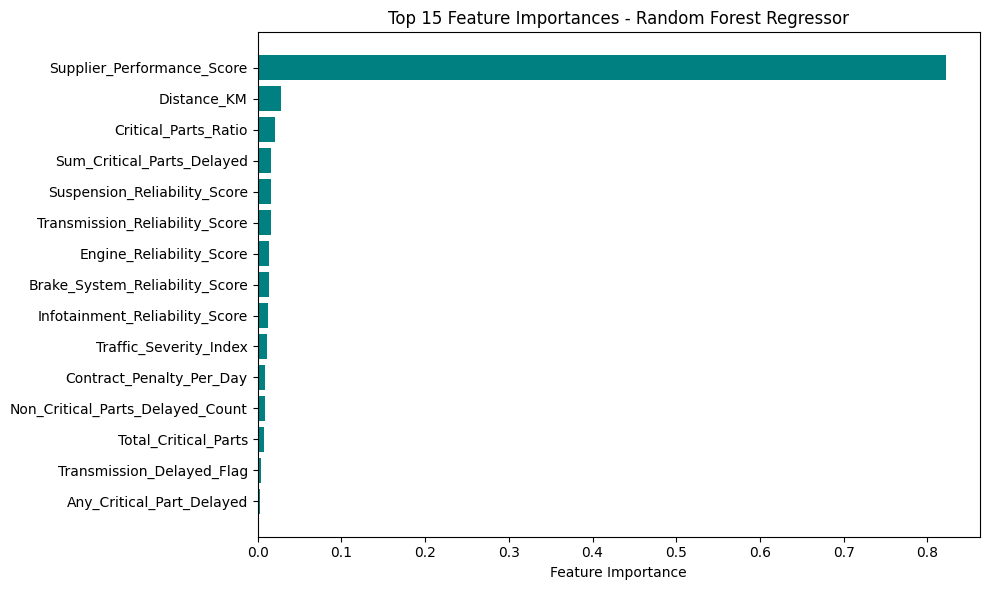

In [50]:
# Step 1: Get feature importances from the trained Random Forest
importances = rf.feature_importances_
features = X_train.columns

# Step 2: Create a DataFrame for feature importances
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Step 3: Sort and get top 15 features
top_feats = feat_imp_df.sort_values(by='Importance', ascending=False).head(15)

# Step 4: Print top 15 feature names (for deployment use)
print("Top 15 Features to use for deployment:\n")
print(top_feats['Feature'].tolist())

# Step 5: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_feats['Feature'][::-1], top_feats['Importance'][::-1], color='teal')  # reverse for top-down order
plt.xlabel("Feature Importance")
plt.title("Top 15 Feature Importances - Random Forest Regressor")
plt.tight_layout()
plt.show()
